In [ ]:
import matplotlib.pyplot as plt
import ROOT , uproot
import numpy as np
import os,copy,json
import itertools as itrTools
import mplhep as hep
from scipy import stats

In [ ]:
def rebinHist(count,edges,n=2):
    rCount=[]
    rEdges=[]
    
    rEdges.append(edges[0])
    i=0
    while i  < len(count):
        k=0
        ct=0
        while k < n:
            if i>=len(count):
                break
            ct+=count[i]
            k+=1
            i+=1
        if i>=len(count):
            break
        if i>=len(edges):
            break
        rCount.append(ct)
        rEdges.append(edges[i+1])    
    rCount[-1]+=ct
    rEdges[-1]=edges[len(count)]
            
    return rCount, rEdges

def getTheObjectsFromFile(aFile):
    histStore={}
    for key in aFile.GetListOfKeys():
        kk=key.GetName()
        curObj=aFile.Get(kk)
        if curObj.Class_Name()=='TDirectoryFile':
            histStore[kk]=getTheObjectsFromFile(curObj)
        else:
            histStore[kk]=curObj       
    return histStore

cmap=plt.colormaps.get_cmap('jet')

In [ ]:
metadata=None
with open('data/l1ConditionFnames_2p2.json', 'r') as fp:
    metadata = json.load(fp)
    
fnames=metadata['fnames']   


In [ ]:
filesToLoad=[
    "359569",
    "359571",
    "359575",
    "359595"
]
filesToLoad=list(fnames.keys())

In [ ]:
histStore={}
histFileStore={}
for tag in filesToLoad:
    if tag in histFileStore:
        histFileStore[tag].Close()
    print("loading  tag ",tag)
    histStore[tag]=uproot.open(fnames[tag])

In [ ]:
print(sorted(histStore.keys()))

In [ ]:
allSelectedRuns=["361971","361443","361303","361468","361197","360927","361417",
              "361512","359998","360295","362091","361475","360019","360459",
              "359699","361239","361297","361045","360490","361579","360820",
              "360919","361957","362107","362064","359751","360075","362148",
              "361240","360141","361223","362154","362167","360794","359764",
              "361569","360460","360950","360090","360890","361318","361365",
              "361400","360895","360796","360486","360116","361105","360795",
              "361320","359763","359806","361580","360946","360942","362166",
              "360225","360327","361054","360296","362061","359717","361333",
              "360888","361573","359718","360125","360126","360825","361280",
              "359814","360088","359871","360892","360131","359762","362062",
              "361990","360224","360921","361366","362105","360458","359812",
              "361319","361110","362058","359750","361364","362085","362087",
              "359810","361188","362153","360441","360127","361107","361091",
              "361954","361044","361272","362161","360393","361994","361989",
              "360887","362104","360951","361956","360128","360948","360491",
              "360442","360413","360945","361955","362060","362063","361974",
              "360826","362106","360428","361948","361596","361059","360390",
              "360991","361361","360400","361020","362163","362059","360941",
              "360392","360130"]
EraE=["360019",
      "360295",
      "360090",
      "359764"
     ]
EraF=[
    "361957",
    "361443",
    "361319",
    "361512",
    "360458",
    "360948"
]
EraG=[
    "362437",
    "362616",
    "362657",
    "362698",
    "362760"
]
selectedRuns=EraE+EraF+EraG
basePath='results/plots/conditionScan/'

In [ ]:
allFoundRuns=[]
allLostRuns=[]
for i in range(len(selectedRuns)):
    run=selectedRuns[i]
    if run not in histStore:
#         print(i,run)
        allLostRuns.append(int(run))
        continue
    allFoundRuns.append(int(run))
print("Total runs in selectedRuns : ",len(selectedRuns))
print("Total runs found in histStore : ",len(allFoundRuns))
print("Total runs not in histStore : ",len(allLostRuns))
print("\nallLostRuns : ",np.sort(allLostRuns))

runsToAnalyze=np.sort([str(r) for r  in allFoundRuns])

## nXTPs

In [ ]:
hname='nHCALTP'
normalize=True
colorSpace=np.linspace(0.0,1.0,len(runsToAnalyze))

idx=0
f,ax=plt.subplots(figsize=(20,6),nrows=1,ncols=3)
k=0
for run in runsToAnalyze:
    npHist=histStore[run][hname].to_numpy()
    c,e=rebinHist(npHist[idx], npHist[1],16)
    if normalize:
        c=c/max(np.sum(c),1e-9)
    cIdx=cmap(colorSpace[k]); k+=1
    hep.histplot(c, e,label=run,ax=ax[idx],color=cIdx)
ax[idx].set_title(hname,fontweight='bold')
ax[idx].set_xlim([500,1500])
ax[idx].legend(loc=1)

hname='nECALTP'
normalize=True
idx=1
colorSpace=np.linspace(0.0,1.0,len(runsToAnalyze))
k=0
for run in runsToAnalyze:
    npHist=histStore[run][hname].to_numpy()
    c,e=rebinHist(npHist[0], npHist[1],16)
    if normalize:
        c=c/max(np.sum(c),1e-9)
    cIdx=cmap(colorSpace[k]); k+=1
    hep.histplot(c, e,label=run,ax=ax[idx],color=cIdx)
ax[idx].set_title(hname,fontweight='bold')
ax[idx].set_xlim([0,800])
ax[idx].legend(loc=1)

f.savefig(basePath+'tXTP.png')


hname='nTriggerTower'
normalize=True
idx=2;k=0
for run in runsToAnalyze:
    npHist=histStore[run][hname].to_numpy()
    c,e=rebinHist(npHist[0], npHist[1],16)
    if normalize:
        c=c/max(np.sum(c),1e-9)
    cIdx=cmap(colorSpace[k]); k+=1
    hep.histplot(c, e,label=run,ax=ax[idx],color=cIdx)
ax[idx].set_title(hname,fontweight='bold')
ax[idx].set_xlim([400,3800])
ax[idx].legend(loc=1)

hname='nHCALTPOverNVtx'
normalize=True
idx=0
f,ax=plt.subplots(figsize=(20,6),nrows=1,ncols=3)
k=0
for run in runsToAnalyze:
    npHist=histStore[run][hname].to_numpy()
    c,e=rebinHist(npHist[idx], npHist[1],2)
    if normalize:
        c=c/max(np.sum(c),1e-9)
    cIdx=cmap(colorSpace[k]); k+=1
    hep.histplot(c, e,label=run,ax=ax[idx],color=cIdx)
ax[idx].set_title(hname,fontweight='bold')
ax[idx].set_xlim([10,40])
ax[idx].legend(loc=1)

hname='nECALTPOverNVtx'
normalize=True
idx=1;k=0
for run in runsToAnalyze:
    npHist=histStore[run][hname].to_numpy()
    c,e=rebinHist(npHist[0], npHist[1],1)
    if normalize:
        c=c/max(np.sum(c),1e-9)
    cIdx=cmap(colorSpace[k]); k+=1
    hep.histplot(c, e,label=run,ax=ax[idx],color=cIdx)
ax[idx].set_title(hname,fontweight='bold')
ax[idx].set_xlim([0,20])
ax[idx].legend(loc=1)

hname='nTriggerTowerOverNVtx'
normalize=True
idx=2;k=0
for run in runsToAnalyze:
    npHist=histStore[run][hname].to_numpy()
    c,e=rebinHist(npHist[0], npHist[1],4)
    if normalize:
        c=c/max(np.sum(c),1e-9)
    cIdx=cmap(colorSpace[k]); k+=1
    hep.histplot(c, e,label=run,ax=ax[idx],color=cIdx)
ax[idx].set_title(hname,fontweight='bold')
ax[idx].set_xlim([0,65])
ax[idx].legend(loc=1)
f.savefig(basePath+'tXTPOverVertex.png')

## nTT vs nVtx Analysis

**Loading the nVtx nTT details**

In [ ]:
hname='nVtxVsNTT'
normalize=True
idx=1
# for run in runsToAnalyze:
dataStore={}
goodRuns=[]
negSlopeRuns=[]
for run in histStore:
    npHist=histStore[run][hname].to_numpy()
    x=0.5*(npHist[1][1:]+npHist[1][:-1])
    y=0.5*(npHist[2][1:]+npHist[2][:-1])

    avgs=np.nan_to_num([ np.ma.average(y,weights=(npHist[0][i]))  for i in range(len(npHist[0]))])
    stds=np.nan_to_num([ np.ma.average((y-avgs[i])**2,weights=(npHist[0][i]))  for i in range(len(npHist[0]))])
    stds=np.sqrt(stds)
    dataStore[run]={
        'nVtx':x,
        'avgs':avgs,
        'stds':stds
    }
    dataStore[run]['slope']    =-1e9
    dataStore[run]['slope_err']=0.0
    dataStore[run]['intercept']=0.0
    dataStore[run]['intercept_err']=0.0
    mask=x>20
    mask=np.logical_and(x<60,mask)
    mask=np.logical_and(avgs>1.0,mask)
    if sum(mask) < 5:
        print(run," !!" , end="")
        
        continue
    goodRuns.append(run)
#     print(x)
#     print(x[mask])
#     print(avgs[mask])
    res = stats.linregress(x[mask],avgs[mask])
    dataStore[run]['slope']=res.slope
    dataStore[run]['slope_err']=res.stderr
    dataStore[run]['intercept']=res.intercept
    dataStore[run]['intercept_err']=res.intercept_stderr
#     break
    if res.slope < 0.20:
        negSlopeRuns.append(run)

**Making the slopes and intercepts**

In [ ]:
runList=[int(k) for k in goodRuns ]
slopes=[ dataStore[run]['slope'] for run in goodRuns ]
slopes_err=[ dataStore[run]['slope_err']  for run in goodRuns ]
intercept=[ dataStore[run]['intercept'] for run in goodRuns ]
intercept_err=[ dataStore[run]['intercept_err'] for run in goodRuns ]

**Making Intercept and slope plots**

In [ ]:
f,ax=plt.subplots(figsize=(15,4),nrows=1,ncols=2)

ax[0].errorbar(runList,slopes,yerr=slopes_err,fmt='.',ecolor='r')
ax[0].set_title("Slope vs Run-Number")
ax[0].axvline(362154,c='k',label='362154') ; 
ax[0].text(362174,0.80,'362154',rotation=90)
ax[0].axvline(360389,c='magenta',label='Era F') ;
ax[0].text(360450,0.80,'Era F',rotation=90)
ax[0].axvline(362433,c='g',label='Era G')
ax[0].text(362533,0.80,'Era G',rotation=90)
# ax[0].legend()

ax[1].errorbar(runList,intercept,yerr=intercept_err,fmt='.',ecolor='r')
ax[1].set_title("Intercept vs Run-Number")

ax[1].axvline(362154,c='k',label='362154') ; 
ax[1].text(362174,1.0,'362154',rotation=90)
ax[1].axvline(360389,c='magenta',label='Era F') ;
ax[1].text(360450,1.0,'Era F',rotation=90)
ax[1].axvline(362433,c='g',label='Era G')
ax[1].text(362533,1.0,'Era G',rotation=90)

# ax[1].legend()
plt.savefig(basePath+'nTTvsNVTX_slpAndIntercept_vsRunNumber.png',bbox_inches='tight')

**All runs : nTT vs NVTX**

In [ ]:
hname='nVtxVsNTT'
normalize=True
idx=1
# plt.figure(figsize=(25,20))
plt.figure(figsize=(18,10.8))
# for run in runsToAnalyze:

k=0
runsToPlotHere=list(histStore.keys())
# runsToPlotHere=["359569"]
# for run in histStore:
#     if int(run) < 361957:
#         continue
#     runsToPlotHere.append(run)
        
colorSpace=np.linspace(0.0,1.0,len(runsToPlotHere))
for run in runsToPlotHere:
    if run not in histStore:
        print(run," NOT FOUND !!")
        continue
# for run in runsToAnalyze:
    npHist=histStore[run][hname].to_numpy()
    x=dataStore[run]['nVtx']
    avgs=dataStore[run]['avgs']
    stds=dataStore[run]['stds']
    mask= avgs > 5
    cIdx=colorSpace[k]
    plt.errorbar(x[mask],avgs[mask],yerr=stds[mask],fmt='.',c=cmap(cIdx),label=run,elinewidth=1)
    k+=1
plt.xlabel("Number of Offline Vertices")
plt.xlim([0,145])
plt.legend(ncols=5)
plt.title("nTT vs nVtx for different runs [  Era E + Era F + G ( F--> > 360389 G --> >362433) ]",fontweight='bold')
plt.savefig("results/plots/conditionScan/nVtxvsnTT_AllRunsEraEFG.png")
# plt.savefig("results/plots/conditionScan/nVtxvsnTT_AllRunsPost361957.png")

**Selected runs , ntt vs nvtx**

In [ ]:
hname='nVtxVsNTT'
normalize=True
idx=1
# plt.figure(figsize=(25,20))
plt.figure(figsize=(8,6))
# for run in runsToAnalyze:

k=0
runsToPlotHere=negSlopeRuns #["362617"]#"361569","361573","361579","361580","361957","361989"]
colorSpace=np.linspace(0.0,1.0,len(runsToPlotHere))
for run in runsToPlotHere:
    if run not in histStore:
        print(run," NOT FOUND !!")
        continue
# for run in runsToAnalyze:
    npHist=histStore[run][hname].to_numpy()
    x=dataStore[run]['nVtx']
    avgs=dataStore[run]['avgs']
    stds=dataStore[run]['stds']
    mask= avgs > 5
    cIdx=colorSpace[k]
    plt.errorbar(x[mask],avgs[mask],yerr=stds[mask],fmt='.',c=cmap(cIdx),label=run,elinewidth=1)
    k+=1
plt.xlabel("Number of Offline Vertices")
plt.ylabel("nTT")
plt.xlim([0,90])
plt.legend(ncols=1,loc=0)
plt.title("nTT vs nVtx ",fontweight='bold')
# plt.savefig(basePath+'nTTvsNVtx_gap1.png')

## IsoEt Study

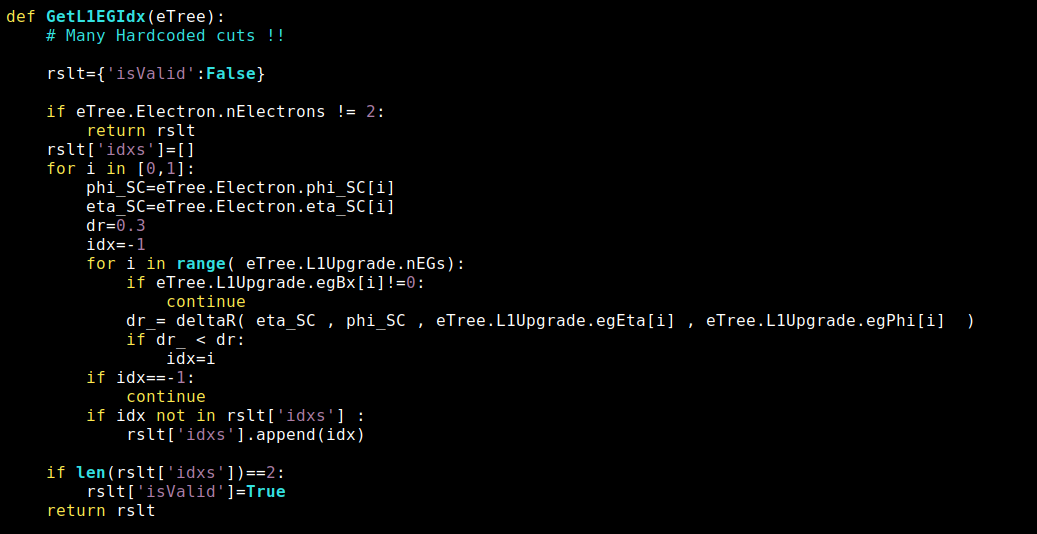


* requirements 
    * Exactly 2 electrons in the event 
    * Both has a level1 match


In [ ]:
hname='isoEt'
normalize=True
idx=0
f,ax=plt.subplots(figsize=(20,10),nrows=1,ncols=1) ;ax=[ax]
k=0
runsToAnalyzeHere=list(histStore.keys())

runsToAnalyzeHere=["359998"]
for run in histStore:
    if int(run) < 361957:
        continue
    runsToAnalyzeHere.append(run)

colorSpace=np.linspace(0,1.0,len(runsToAnalyzeHere))
for run in runsToAnalyzeHere:
    npHist=histStore[run][hname].to_numpy()
    c,e=rebinHist(npHist[idx], npHist[1],1)
    if sum(c) <100:
        continue
    if normalize:
        c=c/max(np.sum(c),1e-9)
    cIdx=cmap(colorSpace[k]); k+=1
    hep.histplot(c, e,label=run,ax=ax[idx],color=cIdx)
ax[idx].set_title(hname,fontweight='bold')
ax[idx].set_xlim([0,50])
ax[idx].legend(loc=1,ncol=8)
# f.savefig(basePath+'isoEt.png')
f.savefig(basePath+'isoEt_AllG361957.png')

# runsToAnalyzeHere=["359998"]
hname='isoEtPU45To50'
f,ax=plt.subplots(figsize=(20,10),nrows=1,ncols=1) ; ax=[ax]
normalize=True
idx=0
k=0
for run in runsToAnalyzeHere:
    npHist=histStore[run][hname].to_numpy()
    c,e=rebinHist(npHist[0], npHist[1],1)
    if sum(c) <50:
        continue
    if normalize:
        c=np.array(c)/max(np.sum(c),1e-9)
    cIdx=cmap(colorSpace[k]); k+=1
    hep.histplot(c, e,label=run,ax=ax[idx],color=cIdx)
ax[idx].set_title(hname,fontweight='bold')
ax[idx].set_xlim([0,50])
ax[idx].legend(loc=1,ncol=8)
# f.savefig(basePath+'isoEtPU45To50.png')
f.savefig(basePath+'isoEtPU45To50_AllG361957.png')

## nTT vs IsoEt

**Loading the nVtx nTT details**

In [ ]:
hname='nTTVsIsoEt'
normalize=True
idx=1
# for run in runsToAnalyze:
dataStore={}
goodRuns=[]
negSlopeRuns=[]
for run in histStore:
    npHist=histStore[run][hname].to_numpy()
    x=0.5*(npHist[1][1:]+npHist[1][:-1])
    y=0.5*(npHist[2][1:]+npHist[2][:-1])

    avgs=np.nan_to_num([ np.ma.average(y,weights=(npHist[0][i]))  for i in range(len(npHist[0]))])
    stds=np.nan_to_num([ np.ma.average((y-avgs[i])**2,weights=(npHist[0][i]))  for i in range(len(npHist[0]))])
    stds=np.sqrt(stds)
    dataStore[run]={
        'nVtx':x,
        'avgs':avgs,
        'stds':stds
    }
    dataStore[run]['slope']    =-1e9
    dataStore[run]['slope_err']=0.0
    dataStore[run]['intercept']=0.0
    dataStore[run]['intercept_err']=0.0
    mask=x>60
    mask=np.logical_and(x<150,mask)
    mask=np.logical_and(avgs>1.0,mask)
    if sum(mask) < 5:
        print(run," !!" , end="")
        
        continue
    goodRuns.append(run)
#     print(x)
#     print(x[mask])
#     print(avgs[mask])
    res = stats.linregress(x[mask],avgs[mask])
    dataStore[run]['slope']=res.slope
    dataStore[run]['slope_err']=res.stderr
    dataStore[run]['intercept']=res.intercept
    dataStore[run]['intercept_err']=res.intercept_stderr
#     break
    if res.slope < 0.20:
        negSlopeRuns.append(run)

**Making the slopes and intercepts**

In [ ]:
runList=[int(k) for k in goodRuns ]
slopes=[ dataStore[run]['slope'] for run in goodRuns ]
slopes_err=[ dataStore[run]['slope_err']  for run in goodRuns ]
intercept=[ dataStore[run]['intercept'] for run in goodRuns ]
intercept_err=[ dataStore[run]['intercept_err'] for run in goodRuns ]

**Making Intercept and slope plots**

In [ ]:
f,ax=plt.subplots(figsize=(15,4),nrows=1,ncols=2)

ax[0].errorbar(runList,slopes,yerr=slopes_err,fmt='.',ecolor='r')
ax[0].set_title("Slope vs Run-Number")
ax[0].axvline(362154,c='k',label='362154') ; 
ax[0].text(362174,-0.02,'362154',rotation=90)
ax[0].axvline(360389,c='magenta',label='Era F') ;
ax[0].text(360450,-0.02,'Era F',rotation=90)
ax[0].axvline(362433,c='g',label='Era G')
ax[0].text(362533,-0.02,'Era G',rotation=90)
# ax[0].legend()

ax[1].errorbar(runList,intercept,yerr=intercept_err,fmt='.',ecolor='r')
ax[1].set_title("Intercept vs Run-Number")

ax[1].axvline(362154,c='k',label='362154') ; 
ax[1].text(362174,-10.0,'362154',rotation=90)
ax[1].axvline(360389,c='magenta',label='Era F') ;
ax[1].text(360450,-10.0,'Era F',rotation=90)
ax[1].axvline(362433,c='g',label='Era G')
ax[1].text(362533,-10.0,'Era G',rotation=90)

# ax[1].legend()
plt.savefig('results/plots/conditionScan/nttVsIsoEt_slpAndIntercept_vsRunNumber.png',bbox_inches='tight')

**All runs : nTT vs NVTX**

In [ ]:
hname='nTTVsIsoEt'
normalize=True
idx=1
# plt.figure(figsize=(25,20))
plt.figure(figsize=(18,10.8))
# for run in runsToAnalyze:

k=0
runsToPlotHere=list(histStore.keys())
# runsToPlotHere=["359569"]
# for run in histStore:
#     if int(run) < 361957:
#         continue
#     runsToPlotHere.append(run)
        
colorSpace=np.linspace(0.0,1.0,len(runsToPlotHere))
for run in runsToPlotHere:
    if run not in histStore:
        print(run," NOT FOUND !!")
        continue
# for run in runsToAnalyze:
    npHist=histStore[run][hname].to_numpy()
    x=dataStore[run]['nVtx']
    avgs=dataStore[run]['avgs']
    stds=dataStore[run]['stds']
    mask= avgs > 5
    cIdx=colorSpace[k]
#     plt.errorbar(x[mask],avgs[mask],yerr=stds[mask],fmt='.',c=cmap(cIdx),label=run,elinewidth=1)
    plt.scatter(x[mask],avgs[mask],color=cmap(cIdx),label=run,s=1)
    k+=1
plt.ylabel("IsoEt")
plt.xlabel("nTT")
plt.xlim([0,250])
plt.legend(loc=0,ncols=8)
plt.title("nTT vs IsoEt for different runs [  Era E + Era F + G ( F--> > 360389 G --> >362433) ]",fontweight='bold')
plt.savefig(basePath+"nTTVsIsoEt_AllRunsEraEFG.png")
# plt.savefig("results/plots/conditionScan/nVtxvsnTT_AllRunsPost361957.png")

## NTT in EtaBins

In [ ]:
hname='nTToverNVTX_inIEtaRings_0_3'

In [ ]:
allEtaRingHNames=[]
for i in histStore[run]:
    if 'nTToverNVTX_inIEtaRings_' not in i:
        continue
    print(i)
    allEtaRingHNames.append(i)
print(len(allEtaRingHNames))    

In [ ]:
etaBinNames= [ 
     "nTToverNVTX_inIEtaRings_-2_3",
     "nTToverNVTX_inIEtaRings_3_10",
     "nTToverNVTX_inIEtaRings_10_15",
    
     "nTToverNVTX_inIEtaRings_-9_-2",
     "nTToverNVTX_inIEtaRings_-14_-9",
    
     "nTToverNVTX_inIEtaRings_18_23",
     "nTToverNVTX_inIEtaRings_23_29",
    
     "nTToverNVTX_inIEtaRings_-22_-17",
     "nTToverNVTX_inIEtaRings_-28_-22",
    
#      "nTToverNVTX_inIEtaRings_15_16", # overlap
     "nTToverNVTX_inIEtaRings_16_18", # overlap
     "nTToverNVTX_inIEtaRings_-17_-14",
#      "nTToverNVTX_inIEtaRings_-33_-28",
#      "nTToverNVTX_inIEtaRings_29_34",
    ]
hname='nTToverNVTX_inIEtaRings_29_34'
print(len(etaBinNames))

In [ ]:
normalize=True
colorSpace=np.linspace(0,1.0,len(runsToAnalyze))
idx=0
f,ax=plt.subplots(figsize=(20,18),nrows=4,ncols=3)
ax=np.ndarray.flatten(ax)
k=0
for run in runsToAnalyze:
    npHist=histStore[run][hname].to_numpy()
    c,e=rebinHist(npHist[0], npHist[1],1)
    if normalize:
        c=c/max(np.sum(c),1e-9)
    cIdx=cmap(colorSpace[k]); k+=1
    hep.histplot(c, e,label=run,ax=ax[idx],color=cIdx)
    ax[idx].legend(loc=1,ncol=2)
ax[idx].set_ylim([0,0.18])
ax[idx].set_xlim([50,60])
ax[idx].text(51.0,0.12,"Barrel   : [-14,14] " , fontweight='bold')
ax[idx].text(51.0,0.10,"Overlap  : [15,17]  " , fontweight='bold')
ax[idx].text(51.0,0.08,"Endcap   : [18,28]  " , fontweight='bold')
idx=1
for hname in etaBinNames:
    k=0
    print("Doing : ",hname)
    for run in runsToAnalyze:
        npHist=histStore[run][hname].to_numpy()
        c,e=rebinHist(npHist[0], npHist[1],1)
        if normalize:
            c=c/max(np.sum(c),1e-9)
        cIdx=cmap(colorSpace[k]); k+=1
        hep.histplot(c, e,label=run,ax=ax[idx],color=cIdx)
    x=hname.split(";")[0]
    l=x.split('_')[2] 
    h=str( int(x.split('_')[3]) -1 ) 
    ttl="i$\eta$ $\in$ [ " +l+' , '+h+" ]"
    ax[idx].set_title(ttl,fontweight='bold')
    ax[idx].set_xlim([0,3])
    idx+=1
f.savefig(basePath+'nTToverNVTX_inIEtaRings.png',bbox_inches='tight')

#### nHCAL TP

In [ ]:

normalize=True
colorSpace=np.linspace(0,1.0,len(runsToAnalyze))
idx=0
f,ax=plt.subplots(figsize=(20,18),nrows=4,ncols=3)
ax=np.ndarray.flatten(ax)
k=0
for run in runsToAnalyze:
    npHist=histStore[run][hname].to_numpy()
    c,e=rebinHist(npHist[0], npHist[1],1)
    if normalize:
        c=c/max(np.sum(c),1e-9)
    cIdx=cmap(colorSpace[k]); k+=1
    hep.histplot(c, e,label=run,ax=ax[idx],color=cIdx)
    ax[idx].legend(loc=1)
ax[idx].set_xlim([50,60])
ax[idx].set_ylim([0.0,0.16])
ax[idx].text(51.0,0.12,"Barrel   : [-14,14] " , fontweight='bold')
ax[idx].text(51.0,0.10,"Overlap  : [15,17]  " , fontweight='bold')
ax[idx].text(51.0,0.08,"Endcap   : [18,28]  " , fontweight='bold')
idx=1
for hname in etaBinNames:
    hname=hname.replace("nTT","nHCALTP")
    k=0
    print("Doing : ",hname)
    for run in runsToAnalyze:
        npHist=histStore[run][hname].to_numpy()
        c,e=rebinHist(npHist[0], npHist[1],1)
        if normalize:
            c=c/max(np.sum(c),1e-9)
        cIdx=cmap(colorSpace[k]); k+=1
        hep.histplot(c, e,label=run,ax=ax[idx],color=cIdx)
    x=hname.split(";")[0]
    l=x.split('_')[2] 
    h=str( int(x.split('_')[3]) -1 ) 
    ttl="i$\eta$ $\in$ [ " +l+' , '+h+" ]"
    ax[idx].set_title(ttl,fontweight='bold')
    ax[idx].set_xlim([0,3])
    idx+=1

f.savefig(basePath+'nHCALTPoverNVTX_inIEtaRings.png',bbox_inches='tight')

#### nECALTP

In [ ]:

normalize=True
colorSpace=np.linspace(0,1.0,len(runsToAnalyze))
idx=0
f,ax=plt.subplots(figsize=(20,18),nrows=4,ncols=3)
ax=np.ndarray.flatten(ax)
k=0
for run in runsToAnalyze:
    npHist=histStore[run][hname].to_numpy()
    c,e=rebinHist(npHist[0], npHist[1],1)
    if normalize:
        c=c/max(np.sum(c),1e-9)
    cIdx=cmap(colorSpace[k]); k+=1
    hep.histplot(c, e,label=run,ax=ax[idx],color=cIdx)
    ax[idx].legend(loc=1)
ax[idx].set_xlim([50,60])
ax[idx].set_ylim([0.0,0.18])
ax[idx].text(51.0,0.12,"Barrel   : [-14,14] " , fontweight='bold')
ax[idx].text(51.0,0.10,"Overlap  : [15,17]  " , fontweight='bold')
ax[idx].text(51.0,0.08,"Endcap   : [18,28]  " , fontweight='bold')
idx=1
for hname in etaBinNames:
    hname=hname.replace("nTT","nECALTP")
    k=0
    print("Doing : ",hname)
    for run in runsToAnalyze:
        npHist=histStore[run][hname].to_numpy()
        c,e=rebinHist(npHist[0], npHist[1],1)
        if normalize:
            c=c/max(np.sum(c),1e-9)
        cIdx=cmap(colorSpace[k]); k+=1
        hep.histplot(c, e,label=run,ax=ax[idx],color=cIdx)
    x=hname.split(";")[0]
    l=x.split('_')[2] 
    h=str( int(x.split('_')[3]) -1 ) 
    ttl="i$\eta$ $\in$ [ " +l+' , '+h+" ]"
    ax[idx].set_title(ttl,fontweight='bold')
    ax[idx].set_xlim([0,3])
    idx+=1

f.savefig(basePath+'nECALTPoverNVTX_inIEtaRings.png',bbox_inches='tight')
